<img id="top" style="float:left;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>

<center>
    <h3 style="text-align:center;color:#888888;"> 
        <i>--  Introduction au Pyhon --</i></h3>
<h1> Calcul de lieux </h1>
    <h3> Les ensembles de <i>Mandelbrot et Julia</i> </h3>
<h4> -  </h4>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

In [1]:
import numpy as np
from numba import jit # Module très utile pour accélérer les calculs
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

Supposont la suite définie dans le plan complexe par:

$$
z^{n+1}=z^n+c
$$

avec $z,c\in\mathbb{C}$

Si les valeurs initiales $z^0$ et le paramettre $c$ ne sont pas choisit attentivement, la suite diverge rapidement.
Pour illustrer cela, on peut construire une fonction représetant chacun des points de la suite pour une couple particulier de valeur $(z_0,c)$:


In [2]:
def traj(z,c):
    nt=200
    x,y=np.empty(nt),np.empty(nt)
    for i in range(nt):
        z=z**2+c
        x[i]=z.real
        y[i]=z.imag
    return x,y

Exemple pour $z_0=1+0.5i$ et $c=2$

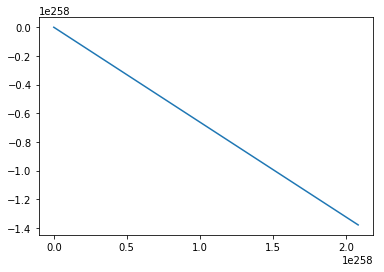

In [3]:
x,y=traj(1+0.5j,2)
plt.plot(x,y)

Exemple pour $z_0=0.2+0.1i$ et $c=0.1+0.2j$

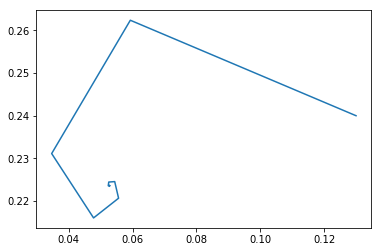

In [4]:
x,y=traj(0.2+0.1j,0.1+0.2j)
plt.plot(x,y)

On peut alors ce demander quelle est la forme de la région du plan complexe pour laquel cette suite de diverge pas.
Pour $z_0=0$, l'ensemble des valeur de c pour la suite converge est l'ensemble de Mandelbrot.

# 1 - Mandelbrot set

Considérons $z_0=0$ et cherchons toutes les valeur de $c$ pour lesquel la suite converge:

In [5]:
@jit
def mandel_iter(x,y,n):
    c=complex(x,y)
    z=0.j
    
    for i in range(n):
        z=z**2+c
        if abs(z)>2:
            return i
    return n

In [6]:
def mandel_comp(center,size,n,nit=200):
    M=np.zeros((n,n))
    X=np.linspace(center[0]-size/2,center[0]+size/2,n)
    Y=np.linspace(center[1]-size/2,center[1]+size/2,n)
    for l,x in enumerate(X):
        for m,y in enumerate(Y):
            M[l,m]=mandel_iter(x,y,nit)
    return X,Y,M

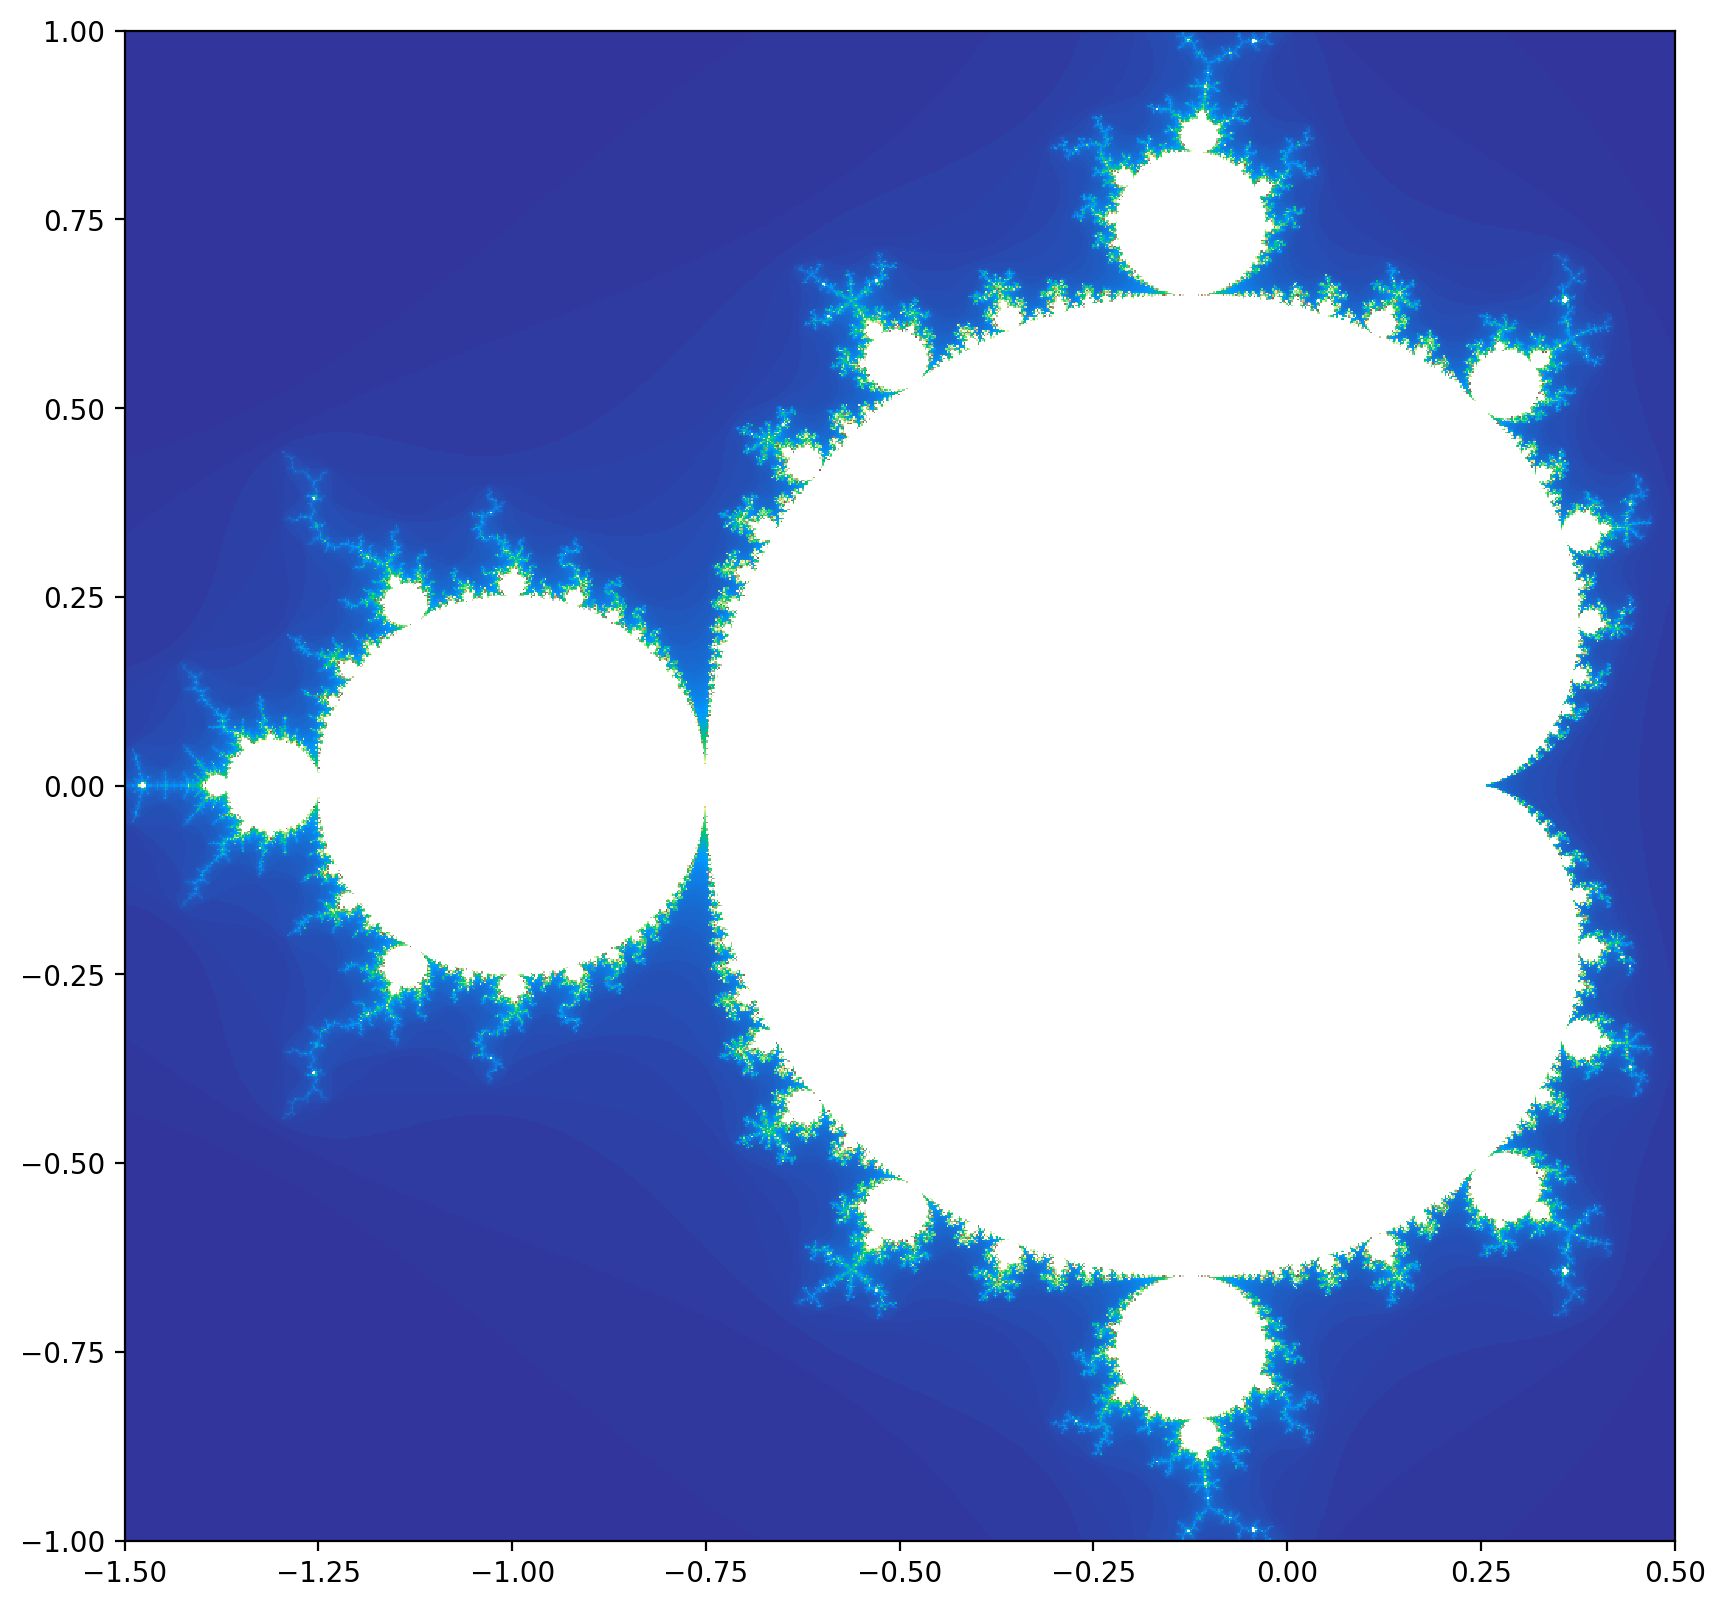

In [7]:
X,Y,M=mandel_comp([-0.5,0],2,1000)
fig=plt.figure(figsize=(10,10),dpi=200)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
#fig.savefig('Mandelbrot_tot.png',bbox_inches='tight',dpi=200)

On peut s'amuser à zoomer sur une région particulière et observer la nature fractale de cet ensemble:

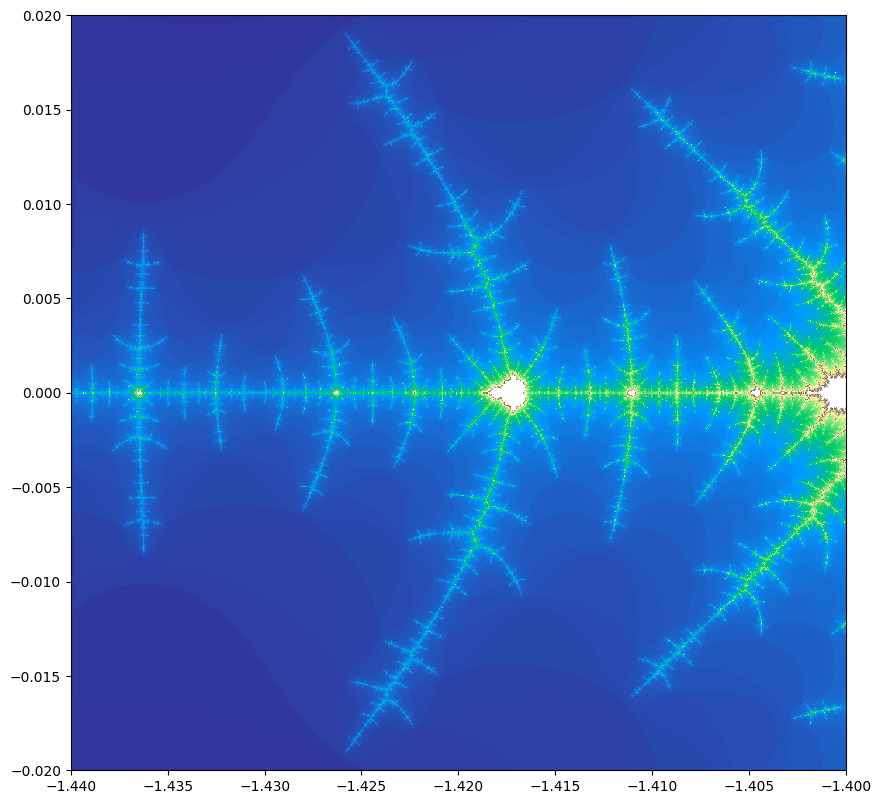

In [8]:
X,Y,M=mandel_comp([-1.42,0.],0.04,1000)
fig=plt.figure(figsize=(10,10),dpi=100)
plt.pcolormesh(X,Y,M.T,cmap='terrain')

On peut maintenant choisir un point particulier de l'ensemble de Mandelbrot (donc une valeur de $c$ particulière) et se demander quels sont les états initiaux ($z_0$) pour lesquels la suite converge. Ce sont les ensembles de Julia.

# 2 - Ensembles de Julia

In [33]:
@jit
def julia_iter(c,x,y,n):
    z=complex(x,y)
    for i in range(n):
        z=z**2+c
        if abs(z)>2:
            return i
    return n

def julia_set(c,size,n,nit=200):
    J=np.zeros((n,n))
    cx,cy=0,0
    #cx,cy=c.real,c.imag
    X=np.linspace(cx-size/2,cx+size/2,n)
    Y=np.linspace(cy-size/2,cy+size/2,n)
    for l,x in enumerate(X):
        for m,y in enumerate(Y):
            J[l,m]=julia_iter(c,x,y,nit)
    return X,Y,J

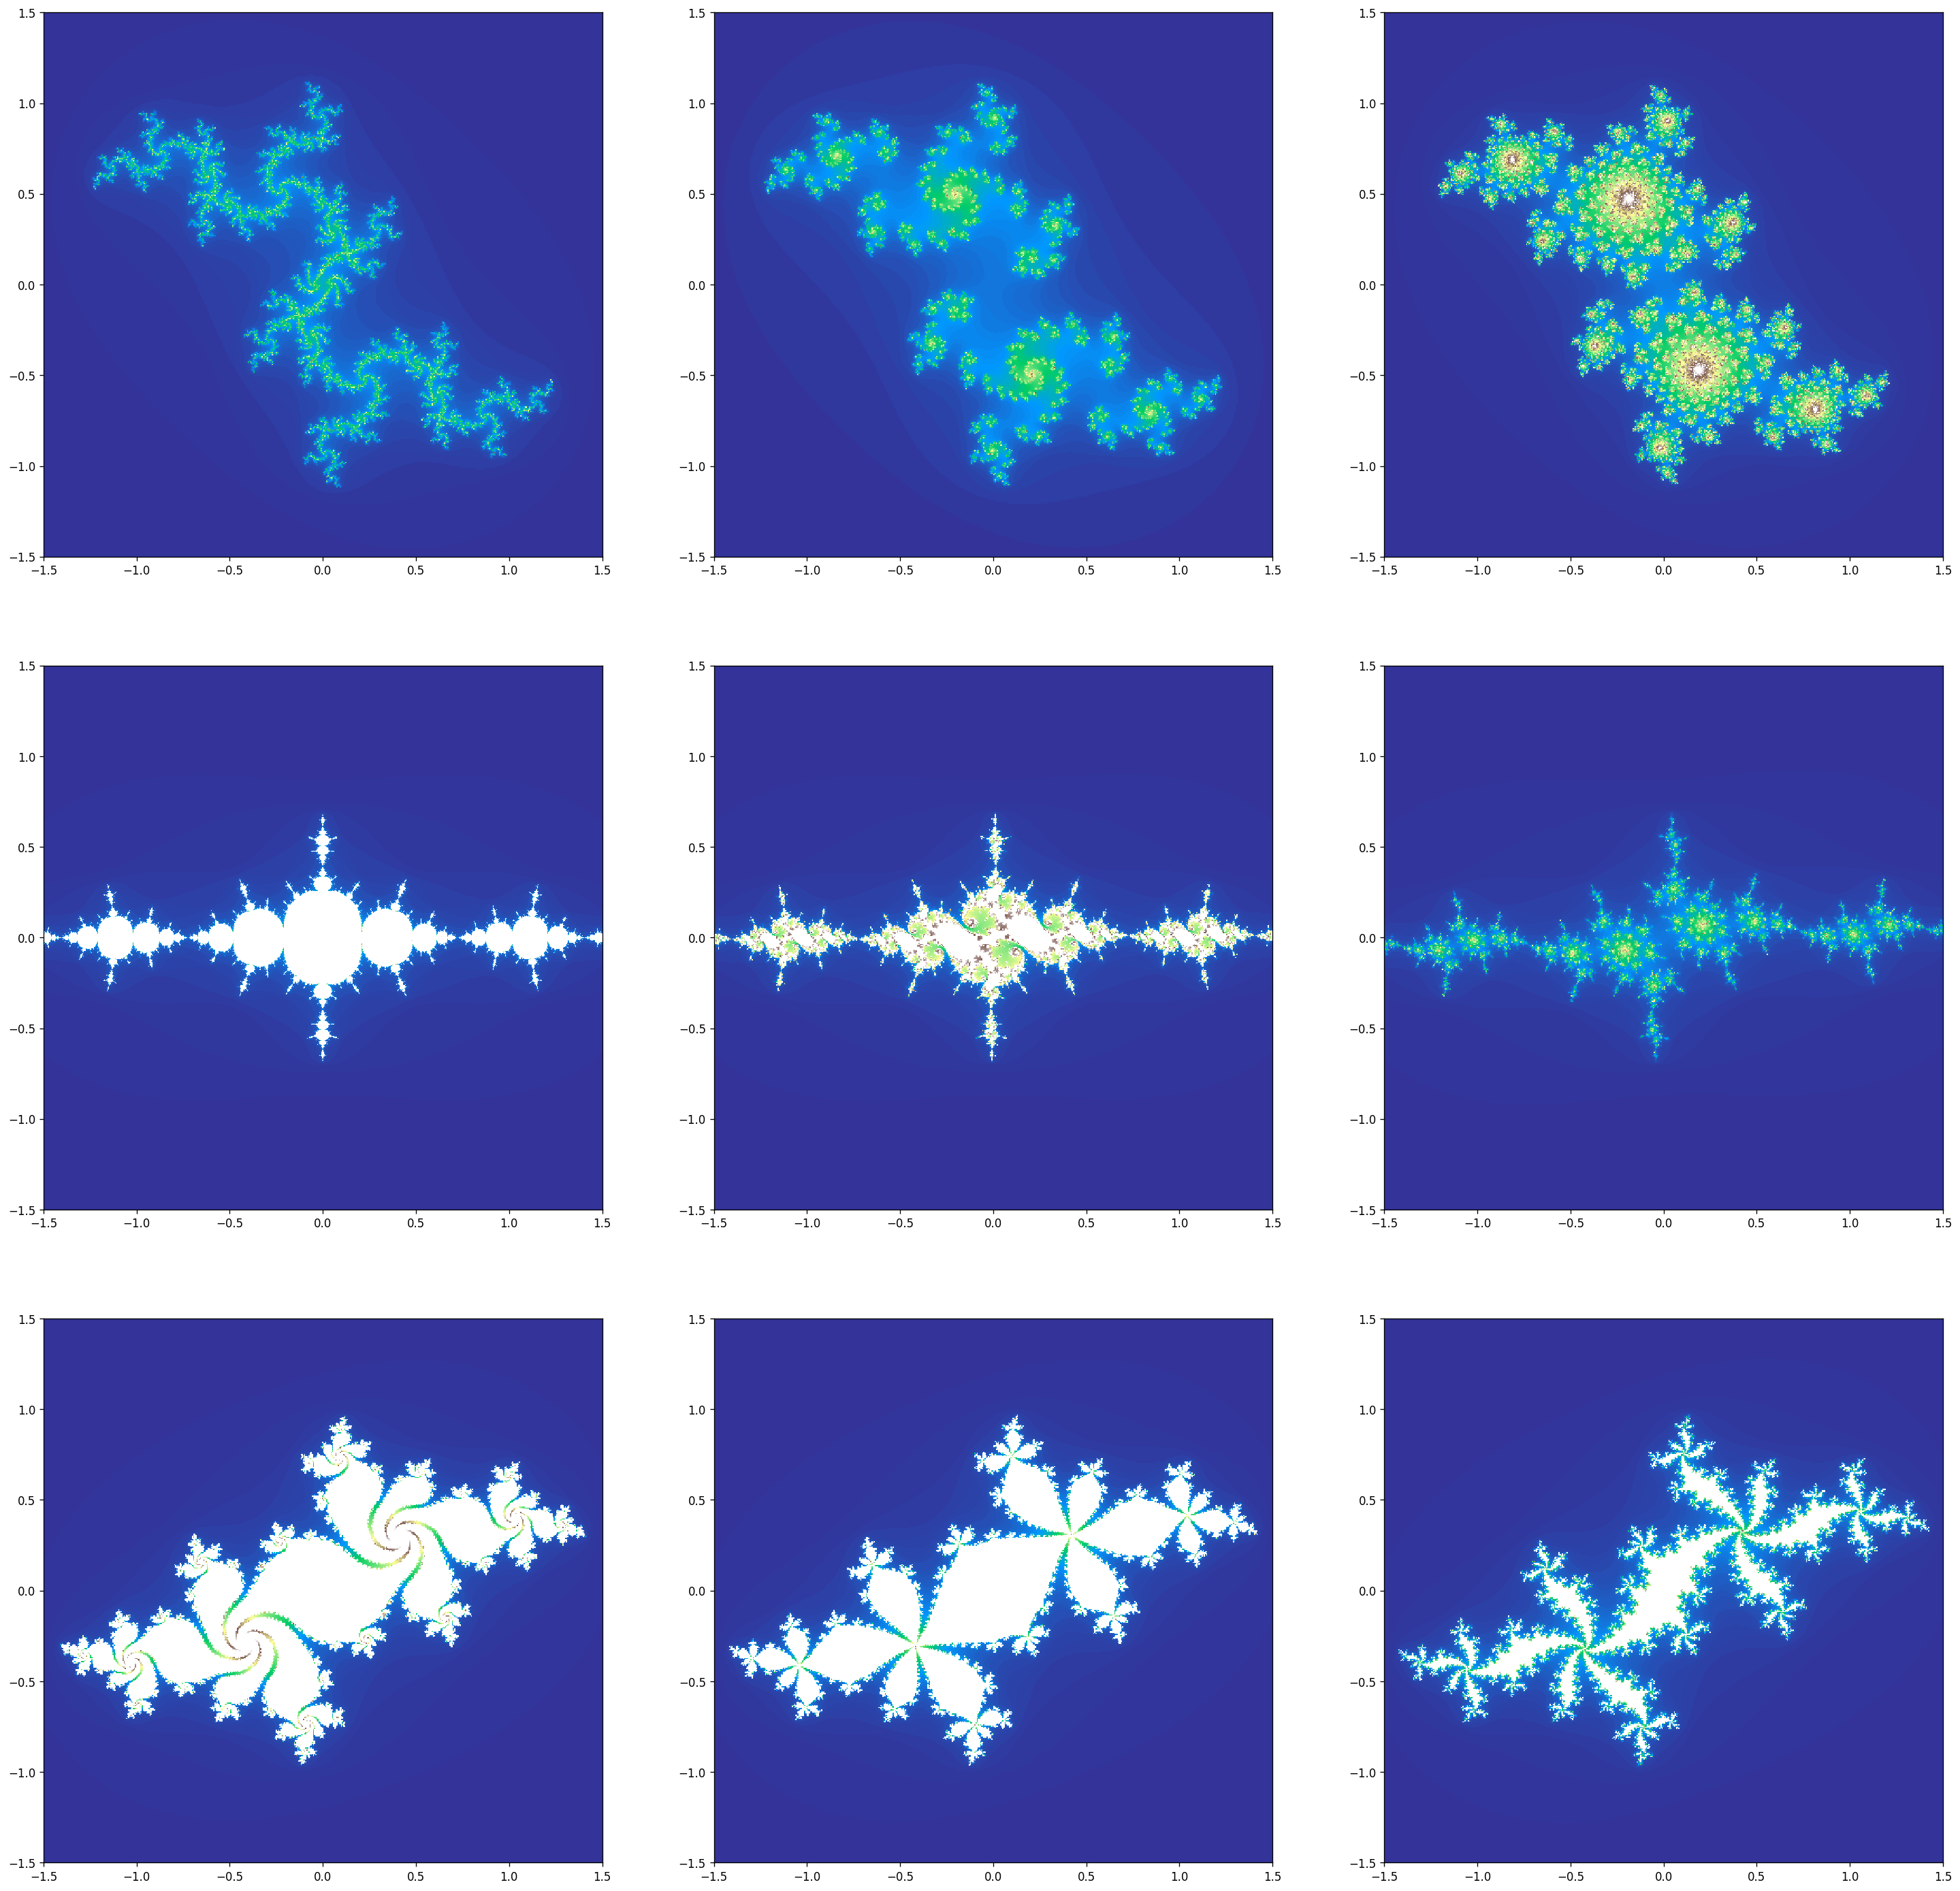

In [34]:
n=500
fig=plt.figure(figsize=(30,30),dpi=120)
fig.add_subplot(331)
X,Y,M=julia_set(0+0.75j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(332)
X,Y,M=julia_set(0+0.7j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(333)
X,Y,M=julia_set(0+0.65j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(334)
X,Y,M=julia_set(-1.25,3,1000)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(335)
X,Y,M=julia_set(-1.25-0.02j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(336)
X,Y,M=julia_set(-1.25-0.1j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(337)
X,Y,M=julia_set(-0.5-0.53j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(338)
X,Y,M=julia_set(-0.5-0.56j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
fig.add_subplot(339)
X,Y,M=julia_set(-0.5-0.6j,3,n)
plt.pcolormesh(X,Y,M.T,cmap='terrain')
#fig.savefig('Julias.png',bbox_inches='tight',dpi=120)

Retrounons à notre fonction de départ pour visualiser la "trajectoire" d'une suite bien choisie:

(-0.9721267028607021,
 0.19207868932876265,
 -0.7142710291144945,
 0.7210132082313795)

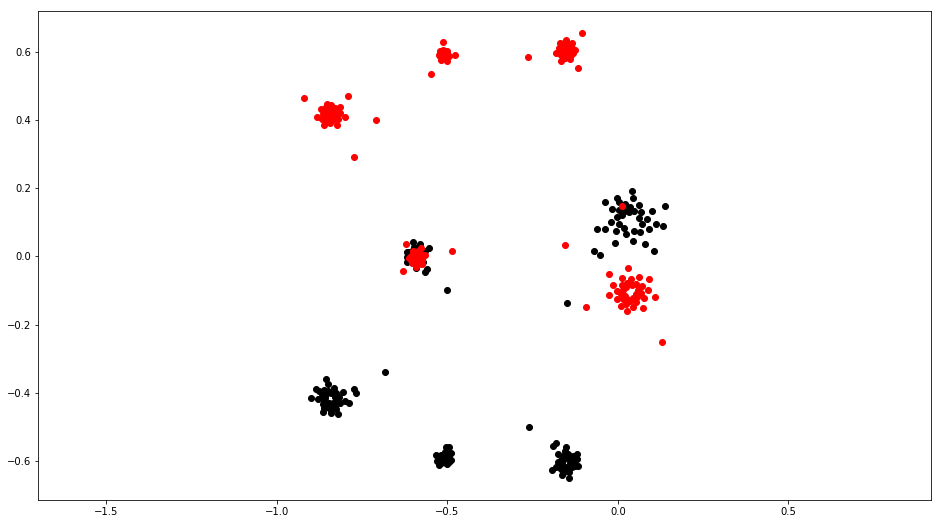

In [35]:
fig=plt.figure(figsize=(16,9))
x,y=traj(-0.5-0.5j,-0.5-0.6j)
x2,y2=traj(0.2-0.5j,-0.5+0.6j)
plt.plot(x,y,'ok')
plt.plot(x2,y2,'or')
plt.axis('equal')

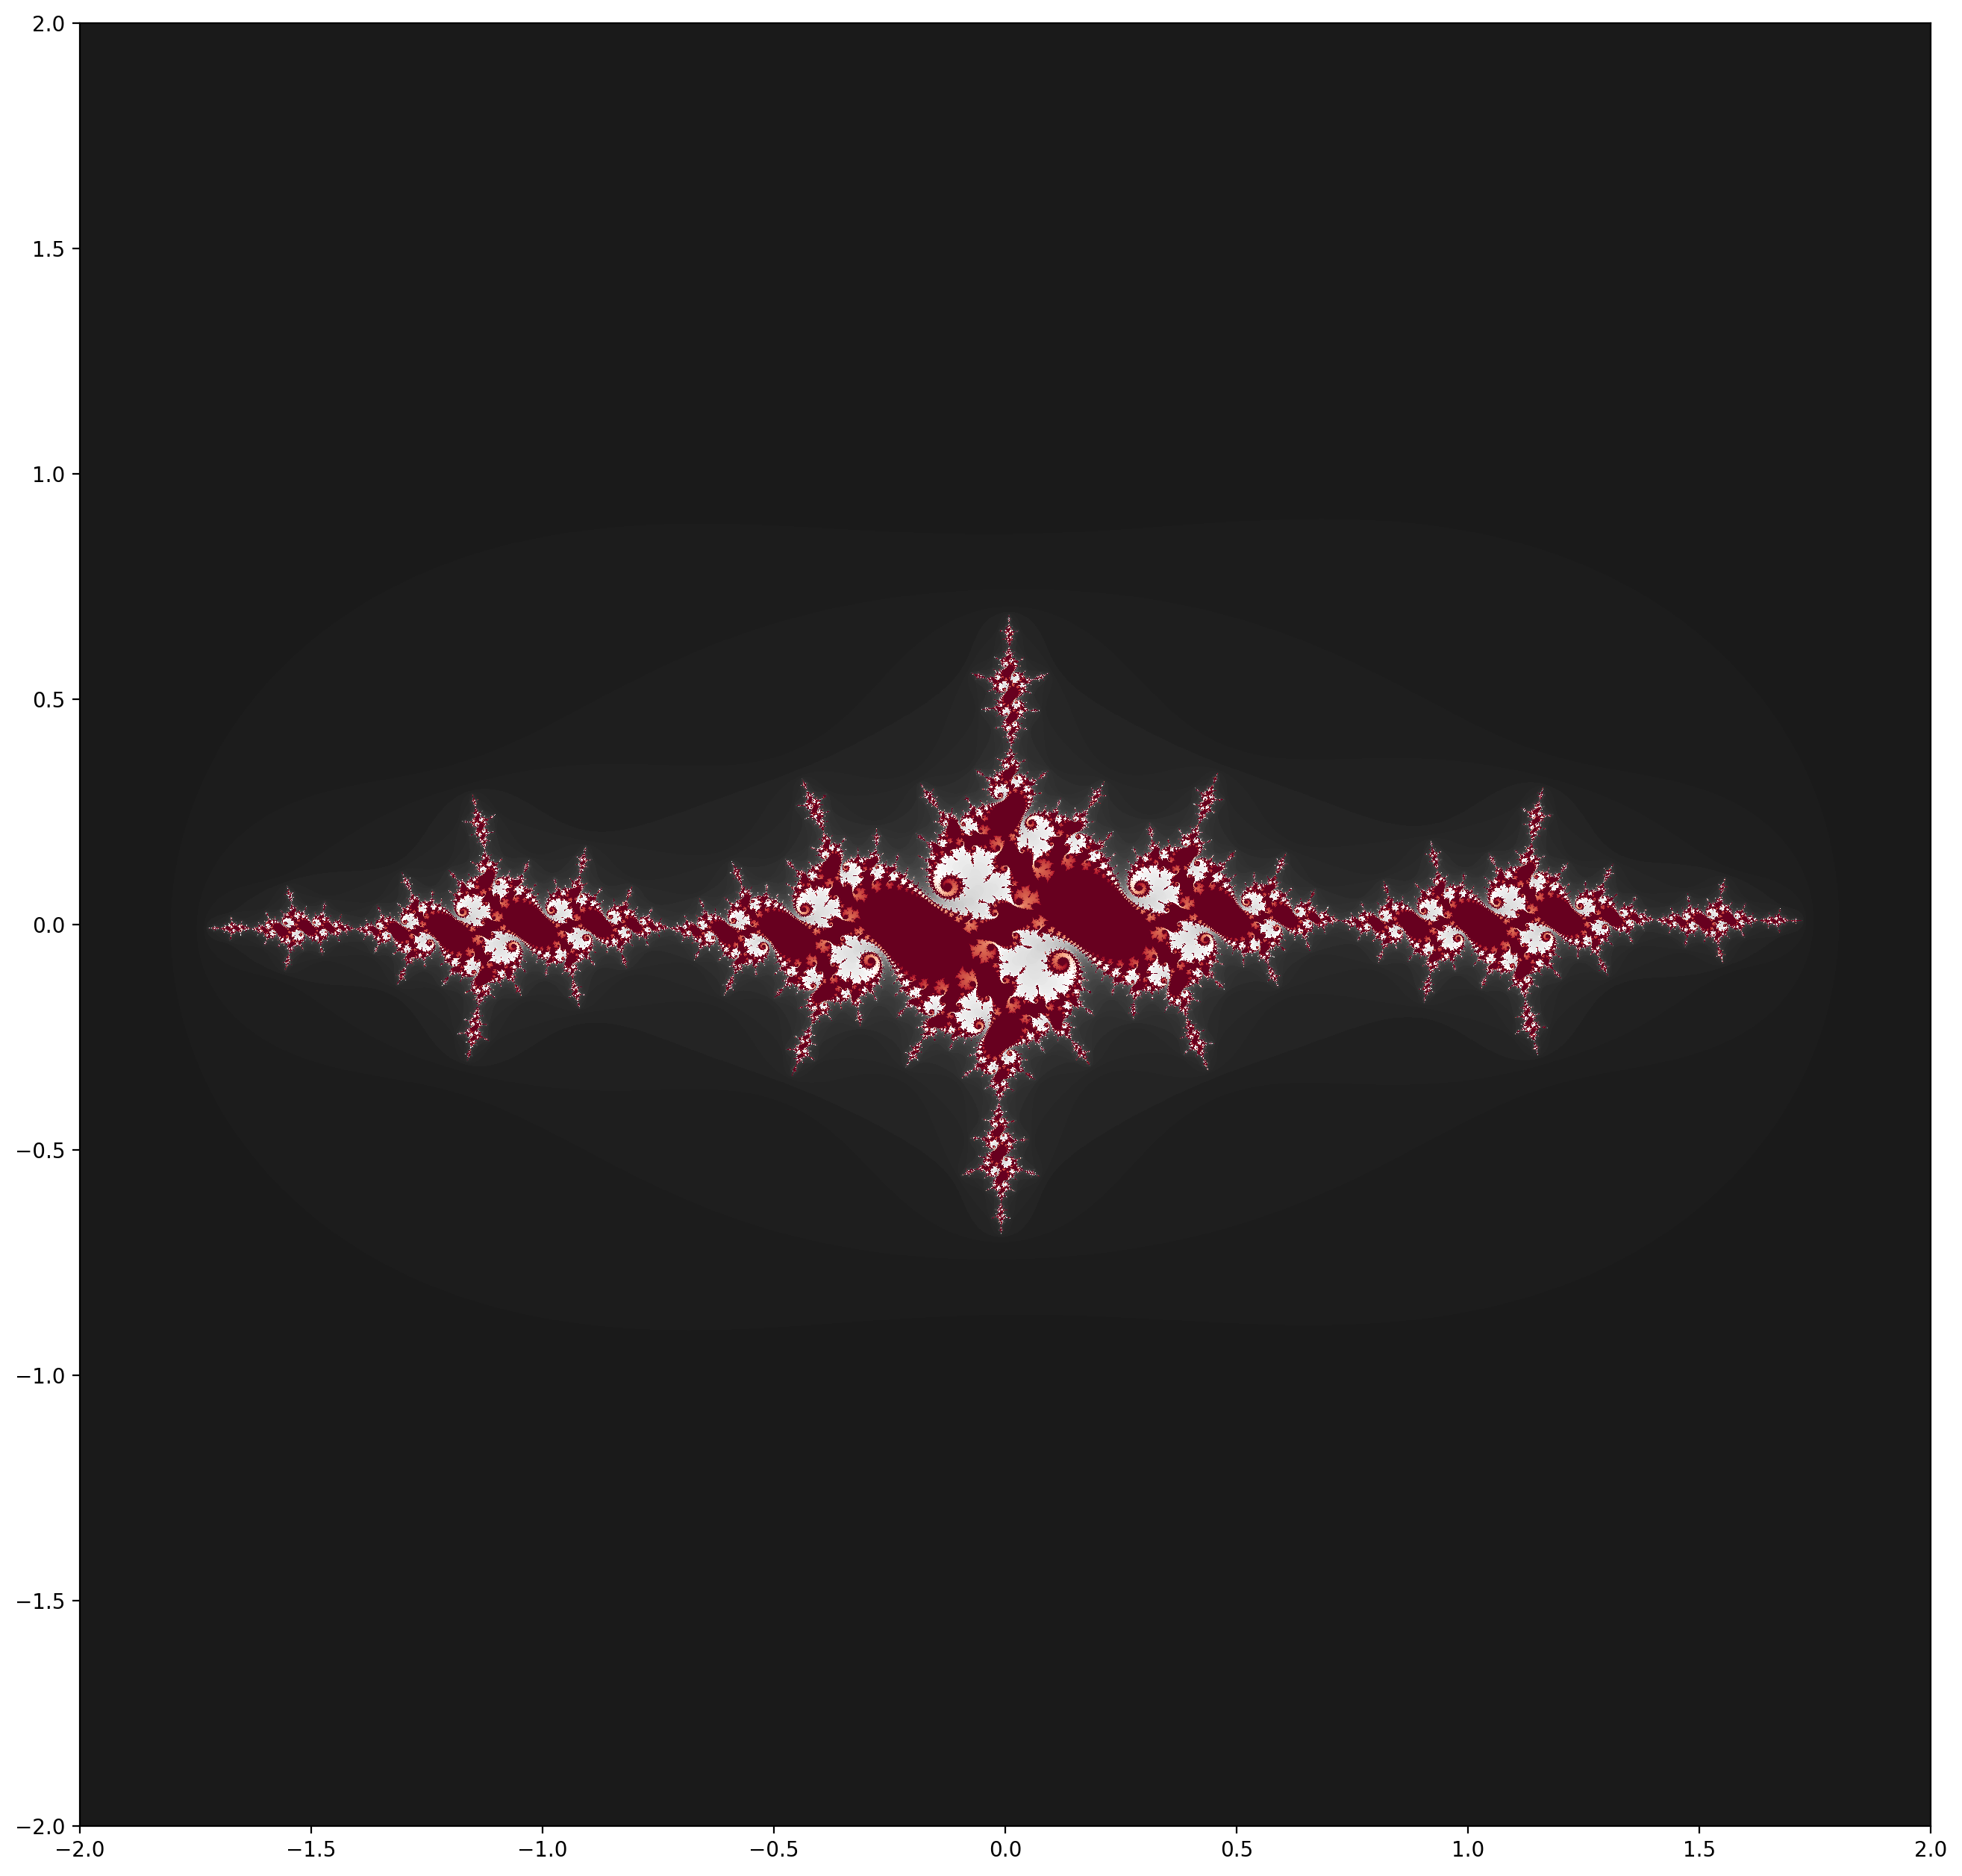

In [36]:
fig=plt.figure(figsize=(16,16),dpi=200)
X,Y,M=julia_set(-1.25-0.02j,4,5000)
plt.pcolormesh(X,Y,M.T,cmap='RdGy_r')
#plt.ylim(-1,1)
fig.savefig('Julia_1p25_0p02.png',bbox_inches='tight',dpi=200)

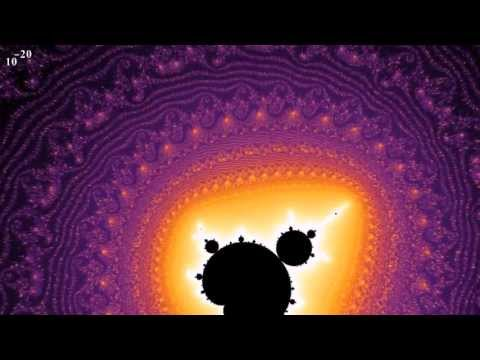

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('PD2XgQOyCCk',width=600,height=400)

In [1]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<img id="top" style="float:right;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:left;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center><a href="#top">Retour en haut de la page</a></center>